In [5]:
import pandas as pd

In [7]:
df=pd.read_csv('https://raw.githubusercontent.com/shsarv/Machine-Learning-Projects/main/Diabetes%20Prediction%20%5BEND%202%20END%5D/dataset/kaggle_diabetes.csv')

In [8]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [9]:
len(df[df['BloodPressure']==0])

90

In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
df['SkinThickness'].mean()

20.935

In [14]:
df['Glucose'].max()

199

In [15]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
import seaborn as sns

<Axes: >

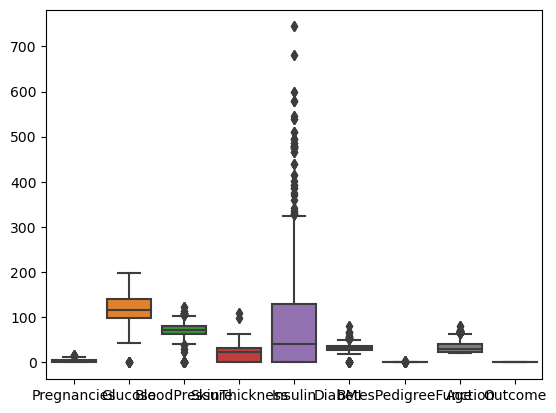

In [17]:
sns.boxplot(df)

In [18]:
from scipy.stats.mstats import winsorize

In [19]:
#for i in df.columns:
    #df[i] = winsorize(df[i], limits=[0.05, 0.05])

<Axes: >

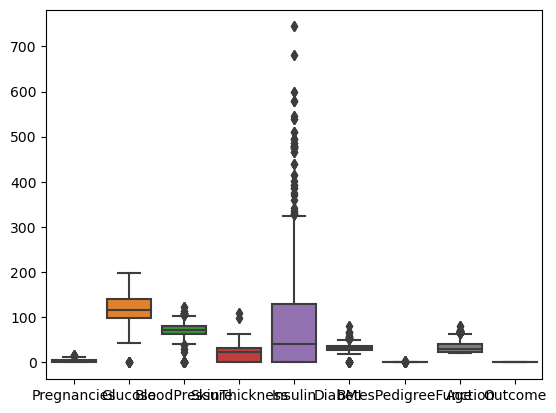

In [20]:
sns.boxplot(df)

In [21]:
from sklearn.linear_model import LogisticRegression


In [22]:
lgr=LogisticRegression()

In [23]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [25]:
lgr.fit(x_train,y_train)

c:\Users\Dell 5593 I5 1TB 512\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
lgr.score(x_test,y_test)

0.794

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dr=DecisionTreeClassifier()

In [29]:
dr.fit(x_train,y_train)
dr.score(x_test,y_test)

0.966

In [30]:
print('decision:',dr.score(x_train,y_train),dr.score(x_test,y_test))
print('logistic:',lgr.score(x_train,y_train),lgr.score(x_test,y_test))

decision: 1.0 0.966
logistic: 0.768 0.794


In [31]:
from sklearn.model_selection import cross_val_score
cross_val_score(lgr,x_train,y_train,cv=5,scoring='accuracy')

c:\Users\Dell 5593 I5 1TB 512\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Dell 5593 I5 1TB 512\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

array([0.76333333, 0.78333333, 0.79333333, 0.76666667, 0.73      ])

In [32]:
lgr1=LogisticRegression(max_iter=5000)

In [33]:
lgr1.fit(x_train,y_train)
lgr1.score(x_test,y_test)


0.792

In [34]:
param_grid={
    'C':[0.1,0.01,1,10,100,1000],
    'penalty':['l1','l2'],
    'solver':['lbgs','liblinear']
}

In [35]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=lgr1,param_grid=param_grid,cv=5,scoring='accuracy')

In [36]:
grid.fit(x_train,y_train)

c:\Users\Dell 5593 I5 1TB 512\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Dell 5593 I5 1TB 512\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Dell 5593 I5 1TB 512\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\Dell 5593 I5 1TB 512\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_con

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': [0.1, 0.01, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbgs', 'liblinear']},
             scoring='accuracy')

In [37]:
grid.score(x_test,y_test)

0.79

In [38]:
best_params=grid.best_params_
print('Best Parameters:',best_params)

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [39]:
from sklearn.metrics import confusion_matrix


In [40]:
y_pred=lgr1.predict(x_test)

In [41]:
cm = confusion_matrix(y_test, y_pred)

In [42]:
cm

array([[290,  30],
       [ 74, 106]], dtype=int64)

In [43]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       320
           1       0.78      0.59      0.67       180

    accuracy                           0.79       500
   macro avg       0.79      0.75      0.76       500
weighted avg       0.79      0.79      0.78       500



In [45]:
c1 = 0
for i,j in zip(y_test,y_pred):
    if i==1 and j==0:
        c1=c1+1
print(c1)

74


In [46]:
print('precision',106/(106+30))

precision 0.7794117647058824


In [47]:
print('Recall',106/(106+74))

Recall 0.5888888888888889


from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [130]:
exclude_column = 'Outcome'

In [131]:
scaled_features = scale.fit_transform(df.drop(columns=[exclude_column]))

In [ ]:
scaled_df = pd.DataFrame(scaled_features, columns=df.drop(columns=[exclude_column]).columns)

scaled_df[exclude_column] = df[exclude_column]

print(scaled_df)

In [134]:
x=scaled_df.drop('Outcome',axis=1)
y=scaled_df['Outcome']

In [135]:
lg=LogisticRegression(max_iter=5000)

In [ ]:
lg.fit(x_train,y_train)

In [ ]:
lg.score(x_test,y_test)

In [138]:
ypred=lg.predict(x_test)

In [ ]:
print(classification_report(y_test,ypred))

In [157]:
import pickle
with open('model.pickle','wb') as model_file:
    pickle.dump(lgr1,model_file)

In [1]:
import pandas as pd

In [2]:
df1=pd.read_csv('https://raw.githubusercontent.com/shsarv/Machine-Learning-Projects/main/Diabetes%20Prediction%20%5BEND%202%20END%5D/dataset/kaggle_diabetes.csv')

In [3]:
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [4]:
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df1['BloodPressure'].unique()

array([ 62,  82,   0,  68,  78,  72,  80,  65,  90,  70,  74,  64,  60,
        50,  54,  76,  84,  92, 110,  66,  56,  88,  58,  85,  86,  75,
        48,  44, 108,  55,  96, 122,  30,  52,  98, 104,  95,  46, 102,
       100,  61,  94,  24,  38, 106, 114,  40], dtype=int64)

In [6]:
df1['BMI'].unique()

array([33.6, 38.2, 44.2, 42.3, 40.7, 46.5, 25.6, 26.1, 36.8, 33.5, 32.8,
       28.9,  0. , 26.6, 26. , 30.1, 25.1, 29.3, 25.2, 37.2, 39. , 33.3,
       37.3, 36.5, 28.6, 30.4, 25. , 29.7, 22.1, 24.2, 27.3, 31.6, 27.6,
       24. , 33.2, 32.9, 37.1, 34. , 40.2, 22.7, 45.4, 27.4, 42. , 28. ,
       39.1, 19.4, 24.4, 33.7, 34.7, 23. , 37.7, 46.8, 40.5, 41.5, 25.4,
       29. , 32.5, 42.7, 19.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4,
       24.6, 48.8, 32.4, 36.6, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4,
       28.7, 49.7, 22.5, 39.6, 29.5, 34.3, 37.4, 31.2, 30.5, 28.2, 23.2,
       53.2, 34.2, 26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8,
       36.9, 39.5, 21.9, 40.6, 47.9, 50. , 40.9, 29.9, 29.6, 31.9, 28.4,
       35.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 52.3,
       39.4, 24.3, 22.9, 34.8, 30.9, 31. , 40.1, 23.9, 37.5, 35.5, 42.8,
       42.6, 41.8, 35.8, 30. , 37.8, 34.6, 28.8, 23.6, 35.7, 36.7, 45.2,
       44. , 46.2, 35. , 43.6, 44.1, 18.4, 29.2, 27

In [7]:
df1['SkinThickness'].unique()

array([ 35,  31,   0,  42,  41,  32,  17,  28,  30,  38,  18,  15,  33,
        19,  25,  39,  26,  23,  37,  47,  24,  27,  11,  21,  34,  10,
        60,  13,  20,  22,  29,  54,  40,  51,  56,  36,  14,  50,  44,
        12,  46,  16,   7,  52,  43,  45,  48,   8,  49,  63,  99,  59,
       110], dtype=int64)

In [8]:
df1['SkinThickness'].median()

23.0

In [9]:
df1['BloodPressure'].median()

72.0

In [10]:
df1.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
for i in ['BloodPressure']:
    df1[i].replace(0,df1[i].mode()[0],inplace=True)

In [12]:
len(df1[df1['BloodPressure']==0])

0

In [13]:
for j in ['SkinThickness']:
    df1[j].replace(0,df1[j].median(),inplace=True)

In [14]:
len(df1[df1['SkinThickness']==0])

0

In [15]:
df1['BMI'].replace(0,df1['BMI'].median(),inplace=True)

In [16]:
len(df1[df1['BMI']==0])

0

In [17]:
x=df1.drop('Outcome',axis=1)
y=df1['Outcome']

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
lg1=LogisticRegression(max_iter=1000)
dr1=DecisionTreeClassifier()

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
lg1.fit(x_train,y_train)
lg1.score(x_test,y_test)

0.792

In [22]:
dr1.fit(x_train,y_train)
dr1.score(x_test,y_test)

0.97

In [23]:
print('decision:',dr1.score(x_train,y_train),dr1.score(x_test,y_test))
print('logistic:',lg1.score(x_train,y_train),lg1.score(x_test,y_test))

decision: 1.0 0.97
logistic: 0.768 0.792


In [25]:
y_pred=lg1.predict(x_test)

In [32]:
c1 = 0
for i,j in zip(y_test,y_pred):
    if i==1 and j==0:
        c1=c1+1
print(c1)

75


In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
cross_val_score(lg1,x_train,y_train,cv=5,scoring='accuracy')

array([0.76      , 0.78      , 0.79333333, 0.76      , 0.72      ])

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       320
           1       0.78      0.58      0.67       180

    accuracy                           0.79       500
   macro avg       0.79      0.75      0.76       500
weighted avg       0.79      0.79      0.78       500



In [30]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[291  29]
 [ 75 105]]


In [33]:
c1 = 0
for i,j in zip(y_test,y_pred):
    if i==1 and j==0:
        c1=c1+1
print(c1)

75


In [300]:
param_grid={
    'C':[0.01,0.001,1,10,100,1000],
    'penalty':['l1','l2'],
    'solver':['lbgs','liblinear']
}

In [301]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=lg1,param_grid=param_grid,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)
grid.score(x_test,y_test)

0.778

In [302]:
best_params=grid.best_params_
print('Best Parameters:',best_params)

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [303]:
y_pred=lg1.predict(x_test)

In [304]:
import numpy as np

In [266]:
np.array(x_test.iloc[0])

array([  4.  , 111.  ,  72.  ,  47.  , 207.  ,  37.1 ,   1.39,  56.  ])

In [268]:
lg1.predict([[4.  , 111.  ,  72.  ,  47.  , 207.  ,  37.1 ,   1.39,  56.  ]])

array([1], dtype=int64)

In [305]:
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,74,23,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,23,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


<Axes: >

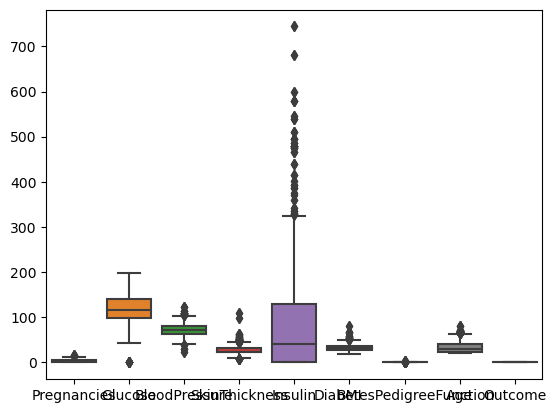

In [306]:
sns.boxplot(df1)

In [313]:
from scipy.stats.mstats import winsorize
for i in df1.columns:
    df1[i]=winsorize(df[i],limits=[0.04,0.04])


<Axes: >

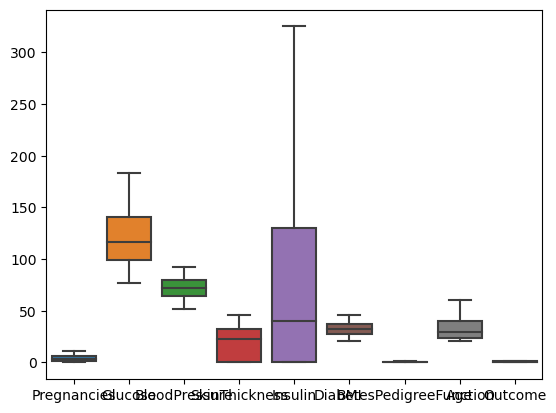

In [314]:
sns.boxplot(df1)

In [34]:

df2=pd.read_csv('https://raw.githubusercontent.com/shsarv/Machine-Learning-Projects/main/Diabetes%20Prediction%20%5BEND%202%20END%5D/dataset/kaggle_diabetes.csv')

In [35]:
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [36]:
df2.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [43]:
for i in ['BloodPressure','SkinThickness','BMI']:
    
    df2[i] = df2.groupby('Age')[i].transform(lambda x: x.replace(0, x.median()))

In [44]:
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,74,23,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,23,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [45]:
x=df2.drop('Outcome',axis=1)
y=df2['Outcome']

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [48]:
lg1=LogisticRegression()


In [50]:
lg1.fit(x_train,y_train)
lg1.score(x_test,y_test)

0.788

In [52]:
import matplotlib.pyplot as plt

In [62]:
import seaborn as sns

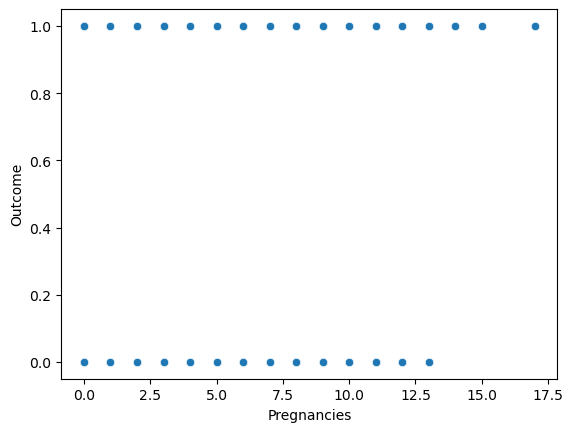

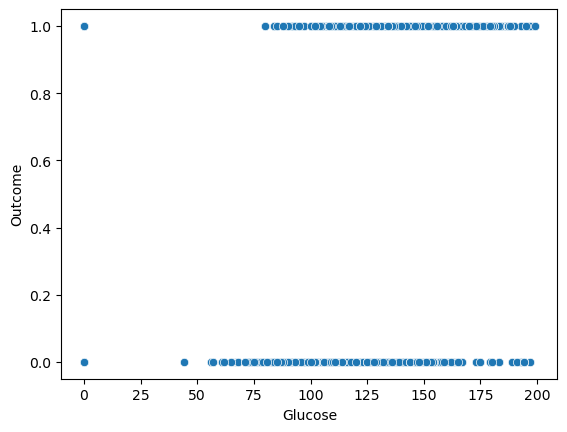

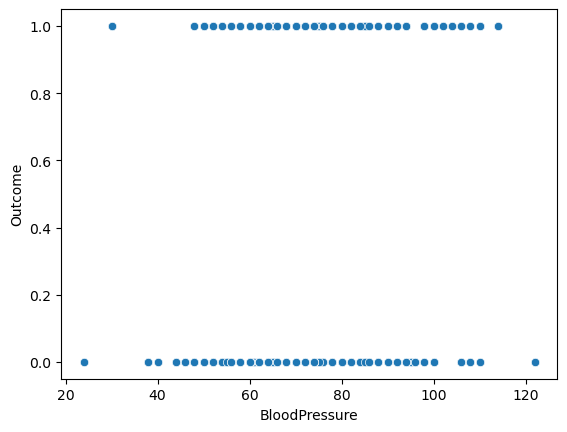

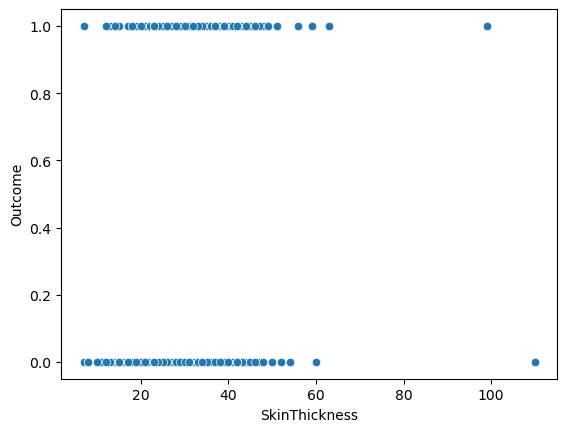

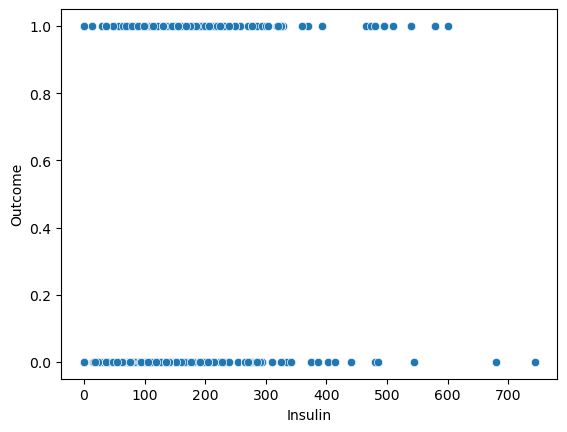

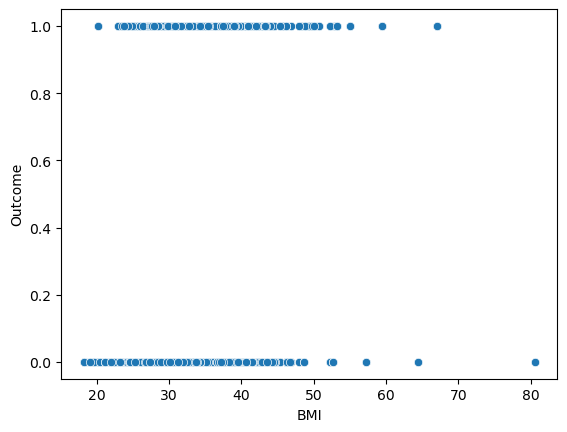

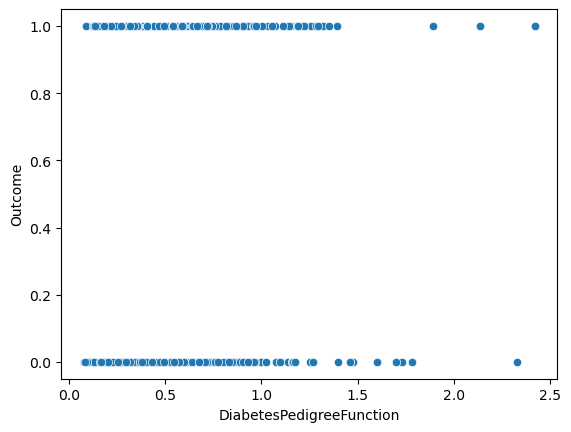

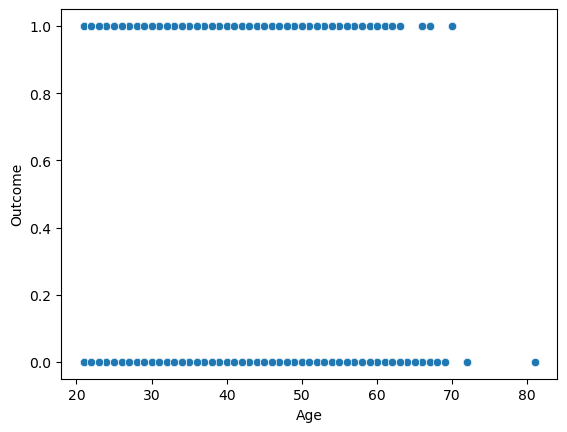

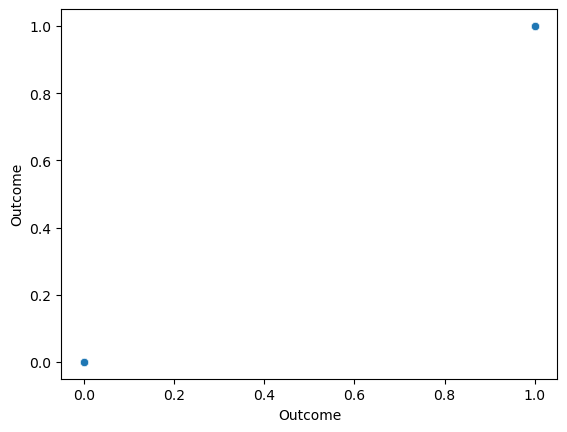

In [64]:
for i in df1.columns:
    sns.scatterplot(y='Outcome',x=i,data=df1)
    plt.show()

In [54]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [55]:
import pandas as pd

In [56]:
import numpy as np

In [57]:
df.loc[df["BMI"==0,"BMI"]]==np.nan

KeyError: (False, 'BMI')